# Predicción de cáncer de mama




---




Para la experimentación se usará un conjunto de datos de 569
personas que hicieron parte de un estudio enfocado en el diagnóstico de cáncer de mama. Cada persona se describe utilizando 17 atributos que se obtienen de una imagen digitalizada de una biopsia por aspiración con aguja fina (FNA) de una masa mamaria. Dichos atributos incluyen características de los núcleos celulares presentes en la imagen tales como área, perímetro, radio, textura, entre otra información. La etiqueta de clase o variable dependiente es el atributo
*diagnosis* cuyos valores pueden ser 1 ó 0, donde 1 significa que la persona tiene cáncer de mama y 0 en caso contrario. En este taller se obtendrán modelos que intentan predecir la variable dependiente
*diagnosis*.

| **#** | **Variable** | **Descripción** |
|:---:|---------------|-----------------|
| **1** | **radius_mean** | Promedio de las distancias desde el centro del núcleo hasta su perímetro; refleja el tamaño medio del núcleo. |
| **2** | **texture_mean** | Medida de la variación en los niveles de gris dentro del núcleo; representa la heterogeneidad de la estructura nuclear. |
| **3** | **perimeter_mean** | Longitud promedio del contorno del núcleo. |
| **4** | **area_mean** | Superficie promedio ocupada por el núcleo. |
| **5** | **smoothness_mean** | Grado de variación local en la longitud del radio; valores altos indican contornos más irregulares. |
| **6** | **compactness_mean** | Relación entre el perímetro y el área del núcleo; valores mayores indican núcleos más densos o compactos. |
| **7** | **symmetry_mean** | Grado de simetría del núcleo celular; los núcleos cancerosos tienden a ser menos simétricos. |
| **8** | **fractal_dimension_mean** | Medida de la complejidad del borde del núcleo, derivada de su geometría fractal. |
| **9** | **radius_worst** | Valor máximo del radio entre todos los núcleos analizados para una muestra. |
| **10** | **texture_worst** | Valor máximo de textura observado; refleja el mayor grado de heterogeneidad nuclear. |
| **11** | **perimeter_worst** | Perímetro más alto registrado entre los núcleos de la muestra. |
| **12** | **area_worst** | Área máxima del núcleo observada. |
| **13** | **smoothness_worst** | Valor más alto de irregularidad en los contornos nucleares. |
| **14** | **compactness_worst** | Mayor grado de compacidad observado en los núcleos. |
| **15** | **symmetry_worst** | Menor grado de simetría registrado entre los núcleos. |
| **16** | **fractal_dimension_worst** | Mayor complejidad de borde nuclear observada. |
| **17** | **diagnosis** | Variable de salida que indica la presencia de cáncer de mama (1 = maligno, 0 = benigno). |

*   Se cargan las bibliotecas que se usarán

In [ ]:
import sklearn
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

*   Se cargan los datos del archivo CSV a un **dataframe**. Un dataframe es una estructura de datos con filas y columnas

In [ ]:
dataFrame=pd.read_csv('breastCancer.csv')
dataFrame

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419,0.07871,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812,0.05667,24.990,23.41,158.80,1956.0,0.12380,0.18660,275.0000,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069,0.05999,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597,0.09744,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6638,173.00000,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809,0.05883,22.540,16.67,152.20,1575.0,0.13740,205.00000,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.1726,0.05623,25.450,26.40,166.10,2027.0,141.00000,0.21130,206.0000,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1752,0.05533,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,159.0000,0.05648,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.2397,0.07016,25.740,39.42,184.60,1821.0,165.00000,0.86810,0.4087,124.00000,1


In [ ]:
dataFrame['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [ ]:
dataFrame.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,4.304801,4.835984,16.965766,0.851112,16.269190,25.677223,107.261213,880.583128,10.633281,23.401569,30.367174,1.964313,0.372583
std,3.524049,4.301036,24.298981,351.914129,21.074558,26.827478,53.846023,7.103493,4.833242,6.146258,33.602542,569.356993,37.236433,86.179359,90.748044,14.464355,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.116700,0.049960,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086410,0.065260,0.163400,0.057800,13.010000,21.080000,84.110000,515.300000,0.117800,0.150700,0.254900,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095940,0.094620,0.181400,0.061660,14.970000,25.410000,97.660000,686.500000,0.133800,0.227900,0.288400,0.080060,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.106100,0.132500,0.203600,0.066400,18.790000,29.720000,125.400000,1084.000000,0.150000,0.384200,0.331800,0.092110,1.000000
max,28.110000,39.280000,188.500000,2501.000000,123.000000,277.000000,304.000000,78.000000,36.040000,49.540000,251.200000,4254.000000,185.000000,709.000000,544.000000,173.000000,1.000000


*   Se usa *info()* para conocer las columnas del dataframe, la cantidad de datos nulos, el tipo de datos de cada columna, y la cantidad de filas

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   fractal_dimension_mean   569 non-null    float64
 8   radius_worst             569 non-null    float64
 9   texture_worst            569 non-null    float64
 10  perimeter_worst          569 non-null    float64
 11  area_worst               569 non-null    float64
 12  smoothness_worst         569 non-null    float64
 13  compactness_worst        569 non-null    float64
 14  symmetry_worst           5

*   Se usa la librería **matplotlib** para graficar la relación entre las columnas *km_drive* y *selling_price* del dataframe





Text(0, 0.5, 'radius_mean')

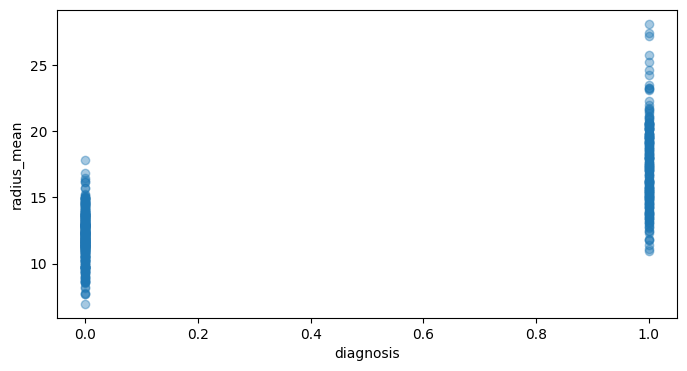

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(x=dataFrame.diagnosis, y=dataFrame.radius_mean, alpha=0.4)
ax.set_xlabel('diagnosis')
ax.set_ylabel('radius_mean')

# Se separan los datos en entrenamiento y prueba

In [ ]:
train_data,test_data=sklearn.model_selection.train_test_split(dataFrame, test_size=0.2)
print(len(train_data),len(test_data))

455 114


In [ ]:
train_data.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst,diagnosis
214,14.190,23.81,92.87,610.7,0.09463,0.13060,0.2235,0.06433,16.860,34.85,115.00,811.3,0.1559,0.4059,0.4724,0.10260,1
358,8.878,15.49,56.74,241.0,0.08293,0.07698,193.0000,0.06621,9.981,17.70,65.27,302.0,0.1015,0.1248,0.2434,0.07431,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,235.0000,0.07389,15.490,30.73,106.20,739.3,0.1703,0.5401,0.4378,0.10720,1
396,13.510,18.89,88.10,558.1,0.10590,0.11470,0.1806,0.06079,14.800,27.20,97.33,675.2,0.1428,257.0000,0.2666,0.07686,0
15,14.540,27.54,96.73,658.8,0.11390,0.15950,0.2303,0.07077,17.460,37.13,124.10,943.2,0.1678,0.6577,0.4218,0.13410,1


# Pipeline para los atributos numéricos

In [ ]:
# 16 atributos numéricos
num_attribs = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','symmetry_mean','fractal_dimension_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','symmetry_worst','fractal_dimension_worst']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

# Pipeline completo

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs)
])

In [ ]:
X_train = full_pipeline.fit_transform(train_data)
Y_train = train_data["diagnosis"]

*  Modelo con **regresión logística**



In [ ]:
modelo1 = LogisticRegression(C=0.001, solver='liblinear')
modelo1.fit(X_train, Y_train)

LogisticRegression(C=0.001, solver='liblinear')

*  Mode con **árboles de decisión**

In [ ]:
modelo2 = tree.DecisionTreeClassifier(criterion='gini',max_depth=10)
modelo2.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=10)

*  Modelos usando **bagging (RandomForest)**

In [ ]:
modelo3 = RandomForestClassifier(n_estimators=5, criterion="entropy", max_depth=10)
modelo3.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=5)

*  Modelo usando **boosting (XGBoost)**

In [ ]:
modelo4 = XGBClassifier(n_estimators=5, max_depth=10)
modelo4.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5,
              n_jobs=None, num_parallel_tree=None, ...)

* Modelo usando una **red neuronal perceptrón multicapa**

In [ ]:
modelo5 = MLPClassifier(activation='tanh',solver='lbfgs', hidden_layer_sizes=(5,4))
modelo5.fit(X_train, Y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 4), solver='lbfgs')

# Ahora se usan los modelos en el conjunto de prueba

In [ ]:
X_test = full_pipeline.transform(test_data)
Y_test = test_data["diagnosis"]

In [ ]:
predicciones1 = modelo1.predict(X_test)
predicciones2 = modelo2.predict(X_test)
predicciones3 = modelo3.predict(X_test)
predicciones4 = modelo4.predict(X_test)
predicciones5 = modelo5.predict(X_test)

*   Se calcula el accuracy, la sensibilidad y especificidad

In [ ]:
accuracy1 = accuracy_score(Y_test, predicciones1)
sensibilidad1 = recall_score(Y_test, predicciones1, pos_label=1)
especificidad1 = recall_score(Y_test, predicciones1, pos_label=0)

accuracy2 = accuracy_score(Y_test, predicciones2)
sensibilidad2 = recall_score(Y_test, predicciones2, pos_label=1)
especificidad2 = recall_score(Y_test, predicciones2, pos_label=0)

accuracy3 = accuracy_score(Y_test, predicciones3)
sensibilidad3 = recall_score(Y_test, predicciones3, pos_label=1)
especificidad3 = recall_score(Y_test, predicciones3, pos_label=0)

accuracy4 = accuracy_score(Y_test, predicciones4)
sensibilidad4 = recall_score(Y_test, predicciones4, pos_label=1)
especificidad4 = recall_score(Y_test, predicciones4, pos_label=0)

accuracy5 = accuracy_score(Y_test, predicciones5)
sensibilidad5 = recall_score(Y_test, predicciones5, pos_label=1)
especificidad5 = recall_score(Y_test, predicciones5, pos_label=0)

In [ ]:
resultados = {
    'Técnica': ['Regresión Logística','Árboles de Decisión','Bagging','Boosting','Redes Neuronales'],
    'Accuracy': [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5],
    'Sensibilidad': [sensibilidad1,sensibilidad2,sensibilidad3,sensibilidad4,sensibilidad5],
    'Especificidad': [especificidad1,especificidad2,especificidad3,especificidad4,especificidad5]
}

# Crear el DataFrame
tabla_resultados = pd.DataFrame(resultados)

# Mostrar la tabla con 4 decimales
tabla_resultados = tabla_resultados.round(4)
tabla_resultados

,Técnica,Accuracy,Sensibilidad,Especificidad
0,Regresión Logística,0.9649,0.9565,0.9706
1,Árboles de Decisión,0.9649,0.9783,0.9559
2,Bagging,1.0000,1.0000,1.0000
3,Boosting,0.9912,0.9783,1.0000
4,Redes Neuronales,0.9474,0.9565,0.9412
